In [1]:
import sys, getopt

In [2]:
import codegen
import ast
import showast
import ctree
import random
import astpretty
import re
import sys, token, tokenize

# were installed

# pip3 install graphviz
# pip3 install codegen
# sudo apt-get install graphviz
# pip3 install ctree
# pip3 install showast
# pip3 install astpretty
# pip install uncompyle6
# sudo apt install pylint
# pip install staticfg
# pip install Random-Word

# Деобфускатор

## Деобфускация байткода python

Самым распространённым методом обфускации кода на python является обфускация файла с расширением .py в файл с расширением .pyc при помощи команды:

python -m compileall

Этот модуль позволяет компилировать все файлы и библиотеки (т. е. все модули) в указанной директории в простой байт-код.

На практике это самый распространённый способ обфускации кода на python, но никаких особых алгоритмов обфускации использовано не было, только компиляция в нечитаемый байт-код.

В качестве примера взята программа для подсчета площади прямоугольного треугольника.
Исходного код находится в директории:

.\obfuscated\examples\compileall

Обфусцируем 
Результат обфускации будет находиться в директории:

.\obfuscated\examples\compileall\__pycache__

In [3]:
path_compileall = './obfuscated/examples/compileall/source.py'
f = open(path_compileall, 'r', encoding="utf-8")
print("\x1b[1;31m"+"Исходный код файла:\n"+"\x1b[0m")
print(f.read())
f.close()

Исходный код файла:




In [4]:
!python3 -m compileall ./obfuscated/examples/compileall

Listing './obfuscated/examples/compileall'...
Compiling './obfuscated/examples/compileall/source.py'...


In [5]:
path_compileall_pyc = "./obfuscated/examples/compileall/source.pyc"
print("\x1b[1;31m"+"Исходный код файла считанный просто при помощи функции open():\n"+"\x1b[0m")
file = open(path_compileall_pyc, 'rb')
print(file.read())
file.close()

Исходный код файла считанный просто при помощи функции open():

b'\x03\xf3\r\n\x96Q\x94`c\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00@\x00\x00\x00sY\x00\x00\x00d\x00\x00\x84\x00\x00Z\x00\x00d\x01\x00GHd\x02\x00GHe\x01\x00e\x02\x00\x83\x00\x00\x83\x01\x00Z\x03\x00d\x03\x00GHe\x01\x00e\x02\x00\x83\x00\x00\x83\x01\x00Z\x04\x00d\x04\x00e\x05\x00e\x00\x00e\x03\x00e\x04\x00\x83\x02\x00\x83\x01\x00\x17GHe\x02\x00\x83\x00\x00\x01d\x05\x00S(\x06\x00\x00\x00c\x02\x00\x00\x00\x02\x00\x00\x00\x02\x00\x00\x00C\x00\x00\x00s\x0c\x00\x00\x00|\x01\x00|\x00\x00\x14d\x01\x00\x15S(\x02\x00\x00\x00Ni\x02\x00\x00\x00(\x00\x00\x00\x00(\x02\x00\x00\x00t\x05\x00\x00\x00widtht\x06\x00\x00\x00height(\x00\x00\x00\x00(\x00\x00\x00\x00s*\x00\x00\x00./obfuscated/examples/compileall/source.pyt\x14\x00\x00\x00square_triangle_area\x02\x00\x00\x00s\x02\x00\x00\x00\x00\x01sn\x00\x00\x00\xd0\xad\xd1\x82\xd0\xb0 \xd0\xbf\xd1\x80\xd0\xbe\xd0\xb3\xd1\x80\xd0\xb0\xd0\xbc\xd0\xbc\xd0\xb0 \xd1\x81\xd1\x87\xd0\xb8\xd1\x82\xd

In [6]:
print("\x1b[1;31m"+"Исходный код файла побайтово в hex:\n"+"\x1b[0m")
path_compileall_pyc = "./obfuscated/examples/compileall/source.pyc"
file = open(path_compileall_pyc, 'rb')
blocksize = 1024
opts,args = getopt.getopt(sys.argv[1:],'f:b:')

for o,a in opts:
    if o == '-f':
        filename = a
    if o == '-b':
        blocksize = a

offset = 0
with file as f:
    block = f.read(blocksize)
    str = ""
    i = 0
    for ch in block:
        str += hex(ch)+" "
        i += 1
        if i == 32:
            str += "\n"
            i = 0
    print(str)

file.close()

Исходный код файла побайтово в hex:

0x3 0xf3 0xd 0xa 0x96 0x51 0x94 0x60 0x63 0x0 0x0 0x0 0x0 0x0 0x0 0x0 0x0 0x5 0x0 0x0 0x0 0x40 0x0 0x0 0x0 0x73 0x59 0x0 0x0 0x0 0x64 0x0 
0x0 0x84 0x0 0x0 0x5a 0x0 0x0 0x64 0x1 0x0 0x47 0x48 0x64 0x2 0x0 0x47 0x48 0x65 0x1 0x0 0x65 0x2 0x0 0x83 0x0 0x0 0x83 0x1 0x0 0x5a 0x3 0x0 
0x64 0x3 0x0 0x47 0x48 0x65 0x1 0x0 0x65 0x2 0x0 0x83 0x0 0x0 0x83 0x1 0x0 0x5a 0x4 0x0 0x64 0x4 0x0 0x65 0x5 0x0 0x65 0x0 0x0 0x65 0x3 0x0 
0x65 0x4 0x0 0x83 0x2 0x0 0x83 0x1 0x0 0x17 0x47 0x48 0x65 0x2 0x0 0x83 0x0 0x0 0x1 0x64 0x5 0x0 0x53 0x28 0x6 0x0 0x0 0x0 0x63 0x2 0x0 0x0 
0x0 0x2 0x0 0x0 0x0 0x2 0x0 0x0 0x0 0x43 0x0 0x0 0x0 0x73 0xc 0x0 0x0 0x0 0x7c 0x1 0x0 0x7c 0x0 0x0 0x14 0x64 0x1 0x0 0x15 0x53 0x28 0x2 
0x0 0x0 0x0 0x4e 0x69 0x2 0x0 0x0 0x0 0x28 0x0 0x0 0x0 0x0 0x28 0x2 0x0 0x0 0x0 0x74 0x5 0x0 0x0 0x0 0x77 0x69 0x64 0x74 0x68 0x74 0x6 0x0 
0x0 0x0 0x68 0x65 0x69 0x67 0x68 0x74 0x28 0x0 0x0 0x0 0x0 0x28 0x0 0x0 0x0 0x0 0x73 0x2a 0x0 0x0 0x0 0x2e 0x2f 0x6f 0x62 

Как можно заметить, исходный код нечеловекочитаем.

Теперь его необходимо расшифровать.
Результат работы деобфускации будет доступен по пути:

./obfuscated/examples/compileall/deobfuscated

Для декомпиляции используется программа uncompyle6

In [7]:
!uncompyle6 ./obfuscated/examples/compileall/source.pyc

# uncompyle6 version 3.7.4
# Python bytecode 2.7 (62211)
# Decompiled from: Python 3.8.5 (default, Jan 27 2021, 15:41:15) 
# [GCC 9.3.0]
# Embedded file name: ./obfuscated/examples/compileall/source.py
# Compiled at: 2021-05-06 23:29:10


def square_triangle_area(width, height):
    return height * width / 2


print 'Эта программа считает площадь прямоугольного треугольника.'
print 'Введите значение длины: '
w = int(input())
print 'Введите значение высоты: '
h = int(input())
print 'Площадь прямоугольного треугольника = ' + str(square_triangle_area(w, h))
input()
# okay decompiling ./obfuscated/examples/compileall/source.pyc


Итог: программа, зашифрованная первым рассмотренным методом обфускации компиляцией, была успешно деобфусцирована.

## Абстрактное Синтаксическое Дерево

Используем паттерн "Visitor". Программный код представляется в виде ассоциативного массива.

Благодаря системному модулю ast нет необходимости подключать стороннюю реализацию.
Достаточно создать класс, наследуемый от
класса NodeTransformer и реализовать в нем
соответствующие методы.

Был подключен дополнительный модуль astpretty для вывода АСД. Пример работы модуля в самом низу.

In [8]:
path_ast = './obfuscated/examples/compileall/source.py'
f = open(path_ast, 'r', encoding="utf-8")
my_tree = ast.parse(f.read())
print(ast.dump(my_tree))
astpretty.pprint(my_tree, show_offsets=False)
f.close()

Module(body=[], type_ignores=[])
Module(body=[], type_ignores=[])


По идее в общем случае это должно выглядеть и работать вот так, но codegen.to_source так как надо сработает только с python 3.9, а у меня 3.8 из-за showast вроде бы или из-за чего-то ещё в jupyter notebook, поэтому в итоге я перееду в пайчарм и под 3.9 буду делать деобфускацию, а тут просто красивое отображение + графики.

code = open(path, 'rb').read()

ast = ast.parse(code)

obf = Obfuscator()

ast2 = obf.visit(ast)

result = codegen.to_source(ast2)

open(path, 'w').write(result)

Детализация методов, использующих абстрактное синтаксическое дерево находится в блокноте ast.ipynb

# Удаление комментариев и dostring

In [9]:
path = './obfuscated/examples/comment/'
filename = 'comment.py'
new_filename = 'without_comment.py'

def do_file(fname, newfname):
    """ Run on just one file.
    """
    source = open(fname)
    mod = open(newfname, "w")

    prev_toktype = token.INDENT
    first_line = None
    last_lineno = -1
    last_col = 0

    tokgen = tokenize.generate_tokens(source.readline)
    for toktype, ttext, (slineno, scol), (elineno, ecol), ltext in tokgen:
        if 0:   # Change to if 1 to see the tokens fly by.
            print("%10s %-14s %-20r %r" % (
                tokenize.tok_name.get(toktype, toktype),
                "%d.%d-%d.%d" % (slineno, scol, elineno, ecol),
                ttext, ltext
                ))
        if slineno > last_lineno:
            last_col = 0
        if scol > last_col:
            mod.write(" " * (scol - last_col))
        if toktype == token.STRING and prev_toktype == token.INDENT:
            pass
            # Docstring
            # mod.write("#--")
        elif toktype == tokenize.COMMENT:
            pass
            # Comment
            # mod.write("##\n")
        else:
            mod.write(ttext)
        prev_toktype = toktype
        last_col = ecol
        last_lineno = elineno

do_file(path + filename, path + new_filename)

# Визуализация

Вспомогательная визуализация АСД для понимания программы человеком

попытки номер 1 отсюда
https://github.com/hchasestevens/show_ast/blob/master/Example.ipynb

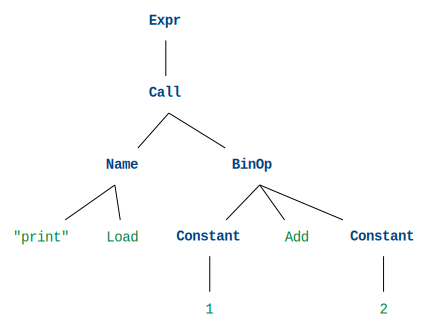

In [10]:
%%showast
print(1 + 2)

In [11]:
def func(a):
    for x in range(10):
        a[x] += x

import inspectshowast.show_source(func)

SyntaxError: invalid syntax (<ipython-input-11-204a1376da49>, line 5)

вот собственно и причина, почему тут происходит определённого рода посос.
https://stackoverflow.com/questions/12072252/cant-get-source-code-for-a-method-declared-through-exec-using-inspect-in-pyth

Кратко: showast.show_source использует inspect.getsourcefile для вывода code_obj и не может в вывод из файла, то есть у нас проблемка в том, что придётся подставлять код ручками прям в ноутбук для визуализации, но в принципе не так уж и плохо.

In [ ]:
import inspect

code_str = """
print("Hello Code Objects")
"""
# Create the code object
code_obj = compile(code_str, '<string>', 'exec')
# get the code object
print(code_obj)
#Attributes of code object
print(dir(code_obj))

print(inspect.getsourcefile(code_obj))

print(inspect.getsourcefile(func))

showast.show_source(code_obj)

## Использование генерации кода из АСД при помощи codegen

In [ ]:
import inspect
expr="""
def foo():
   print("hello world")
"""
p=ast.parse(expr)

p.body[0].body = [ ast.parse("return 42").body[0] ] # Replace function body with "return 42"

print(codegen.to_source(p))

а дальше проблема несовместимости с версией 3.8, потому что в 3.9 появились starargs и codegen без них работать отказывается напрочь!!!

нормас, сделаю часть обфускатора тут красиво расписанную по отдельности, а потом соберу его по кусочкам в другом conda env под 3.9 python в цельный проект не в jupyter notebook, а в каком-нибудь pyCharm на какой-нибудь Windows

In [ ]:
s = """
def example_function(a):
    for x in range(10):
        a[x] += x
"""
p = ast.parse(s)

print(codegen.to_source(p))

showast.show_source(codegen.to_source(p))

## Вывод самого дерева АСД

попытки номер 2 отсюда

https://github.com/asottile/astpretty

https://stackoverflow.com/questions/58924031/generating-a-text-representation-of-pythons-ast

In [ ]:
code = "one_plus_two = 1+2"
tree = ast.parse(code)
ast.dump(tree)

In [ ]:
code = "one_plus_two = 1+2"
tree = ast.parse(code)
astpretty.pprint(tree, show_offsets=False)

In [ ]:
code = '''def func(a):
    for x in range(10):
        a[x] += x'''

tree = ast.parse(code)
astpretty.pprint(tree, show_offsets=False)

ну что ж, сойдёт!

ctree вообще не работало, хз, почему, ничего не показывало и всё

Может быть ещё граф потока управления, но больше вроде бы ничего особо не требуется для человеческого восприятия

Ну мб разве что что-то из uml типа flow diagramm или Диаграмма последовательности, но тут хз

# Control frow graph

In [ ]:
from staticfg import CFGBuilder

path_ast = './obfuscated/examples/ast/control_flow.py'
filename = 'control_flow.py'
cfg = CFGBuilder().build_from_file(filename, path_ast)
cfg.build_visual('example', 'png')

In [1]:
from staticfg import CFGBuilder

path_ast = './obfuscated/examples/ast/exception_source.py'
filename = 'exception_source.py'
cfg = CFGBuilder().build_from_file(filename, path_ast)
cfg.build_visual(filename, 'png')

In [2]:
from staticfg import CFGBuilder

path_ast = './obfuscated/examples/ast/condition_source.py'
filename = 'condition_source.py'
cfg = CFGBuilder().build_from_file(filename, path_ast)
cfg.build_visual(filename, 'png')

In [4]:
# import py2cfg
from py2cfg import CFGBuilder

path_ast = './obfuscated/examples/ast/condition_source.py'
filename = 'condition_source.py'

cfg = CFGBuilder().build_from_file(filename, path_ast)
cfg.build_visual(filename, 'png')

'exception_source.png'

In [5]:
from py2cfg import CFGBuilder

path_ast = './obfuscated/examples/ast/exception_source.py'
filename = 'exception_source.py'

cfg = CFGBuilder().build_from_file(filename, path_ast)
cfg.build_visual(filename, 'png')

'exception_source.py.png'